#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [4]:
df.shape

(148654, 13)

In [5]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [32]:
df['TotalPay'].mean()

74768.32197169267

In [7]:
df['TotalPay'].median()

71426.60999999999

In [8]:
df['TotalPay'].mode()

0    0.0
Name: TotalPay, dtype: float64

In [9]:
minimum_salary = df['TotalPay'].min()
minimum_salary

-618.13

In [10]:
maximum_salary = df['TotalPay'].max()
maximum_salary

567595.43

In [11]:
range_salary = maximum_salary - minimum_salary
range_salary

568213.56

In [12]:
df['TotalPay'].std()

50517.00527394987

**3.Data Cleaning:** Handle missing data by suitable method with explain why you use it.

### I used two methods because there are empty columns such as (Notes & Status),I used the method to remove rows or columns with missing values.
### As for the second method( Replace missing values with the mean, median, and mode of the respective column), I used it because there were not many missing values ​​compared to the number of existing rows. I took the arithmetic mean for each of them and added it in place of the missing values.

In [13]:
df.drop(['Status', 'Notes'], axis=1, inplace=True)
df1= ['BasePay', 'OvertimePay', 'OtherPay','Benefits']
for column in df1:
  df[column]= df[column].fillna(df[column].mean())

df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18000,0.000000,400184.250000,25007.893151,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02000,245131.880000,137811.380000,25007.893151,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13000,106088.180000,16452.600000,25007.893151,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00000,56120.710000,198306.900000,25007.893151,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60000,9737.000000,182234.590000,25007.893151,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00000,0.000000,0.000000,0.000000,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,66325.44884,5066.059886,3648.767297,25007.893151,0.00,0.00,2014,San Francisco


**4.Basic Data Visualization:** **Create histograms** or **bar charts** to visualize the distribution of salaries, and **use pie charts** to represent the proportion of employees in different departments.

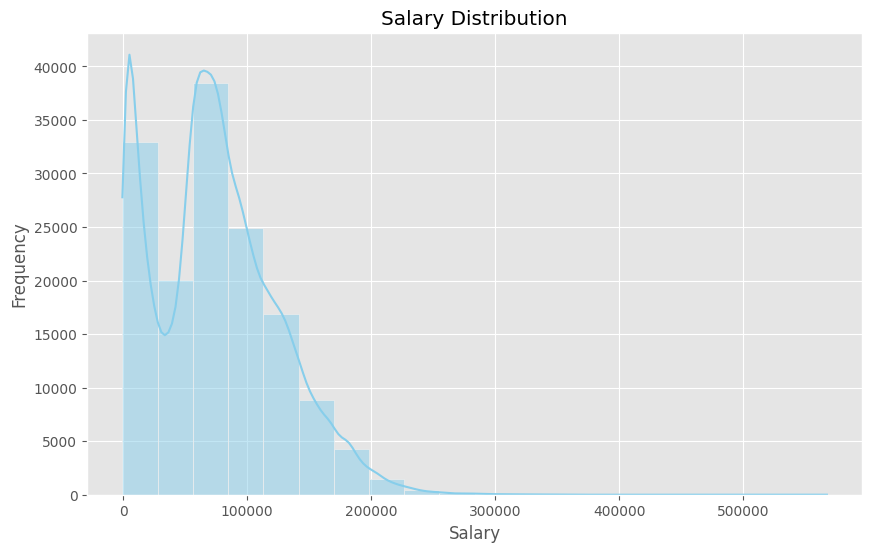

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=20, kde=True, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [20]:
df.JobTitle

0         GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1                        CAPTAIN III (POLICE DEPARTMENT)
2                        CAPTAIN III (POLICE DEPARTMENT)
3                   WIRE ROPE CABLE MAINTENANCE MECHANIC
4           DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)
                               ...                      
148649                                         Custodian
148650                                      Not provided
148651                                      Not provided
148652                                      Not provided
148653                        Counselor, Log Cabin Ranch
Name: JobTitle, Length: 148654, dtype: object

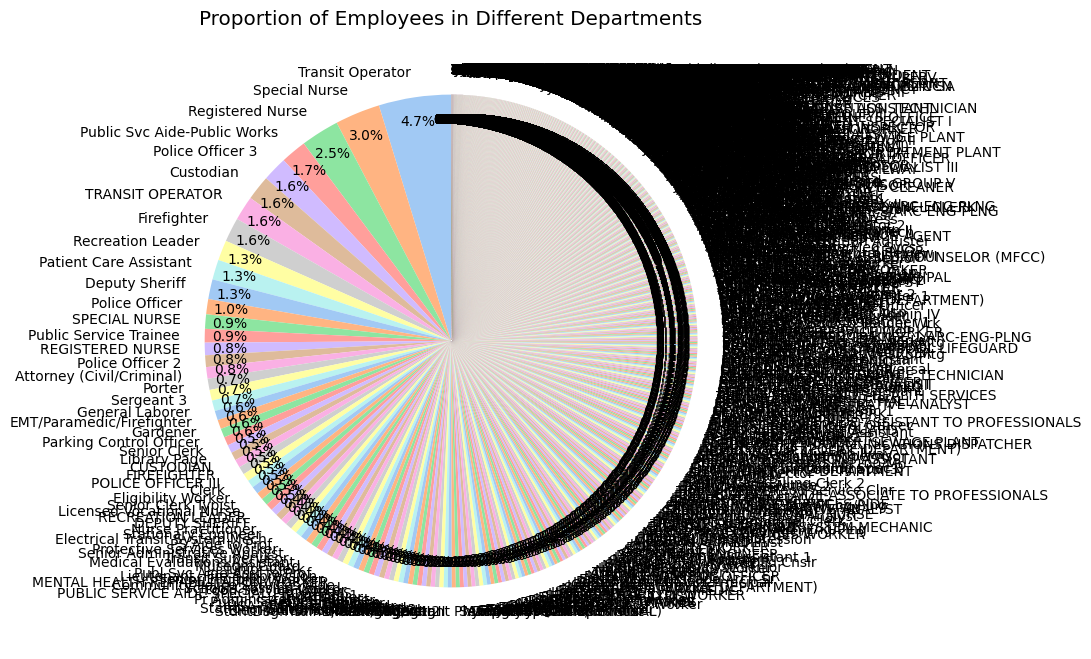

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
department_counts = df['JobTitle'].value_counts()
labels = department_counts.index
colors=sns.color_palette('pastel')
plt.pie(department_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.9)
plt.title('Proportion of Employees in Different Departments')
plt.show()

**5.Grouped Analysis:** Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [29]:
grouped_data = df.groupby('TotalPay')
summary_statistics = grouped_data['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max', 'std'])
summary_statistics

,count,mean,median,min,max,std
TotalPay,,,,,,
-618.13,1,-618.13,-618.13,-618.13,-618.13,NaN
0.00,368,0.00,0.00,0.00,0.00,0.0
0.30,1,0.30,0.30,0.30,0.30,NaN
1.77,1,1.77,1.77,1.77,1.77,NaN
1.83,1,1.83,1.83,1.83,1.83,NaN
...,...,...,...,...,...,...
362844.66,1,362844.66,362844.66,362844.66,362844.66,NaN
390111.98,1,390111.98,390111.98,390111.98,390111.98,NaN
471952.64,1,471952.64,471952.64,471952.64,471952.64,NaN


from matplotlib import pyplot as plt
summary_statistics['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics['median'].plot(kind='hist', bins=20, title='median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics.plot(kind='scatter', x='mean', y='median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics.plot(kind='scatter', x='median', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = summary_statistics.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['mean']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = summary_statistics.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['mean']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'mean'}, axis=1)
              .sort_values('mean', ascending=True))
  xs = counted['mean']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = summary_statistics.sort_values('mean', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('mean')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['median']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = summary_statistics.sort_values('median', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('median')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
summary_statistics['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics['median'].plot(kind='line', figsize=(8, 4), title='median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_statistics['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

**6.Simple Correlation Analysis:** Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.



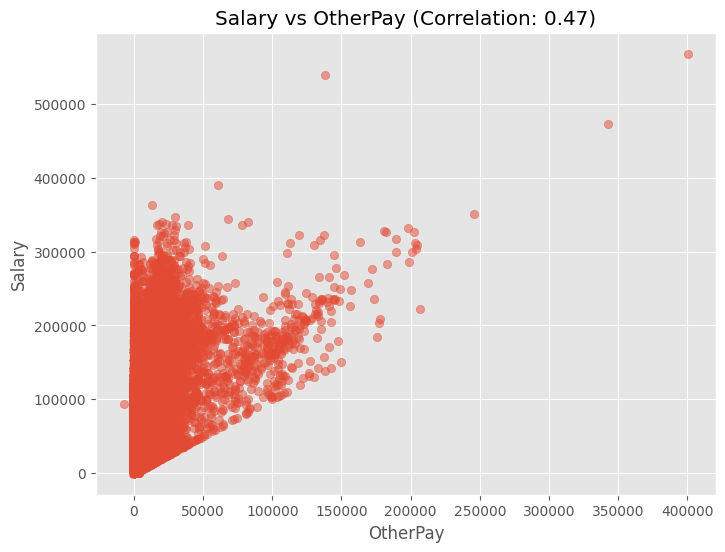

In [31]:
numerical_column = 'OtherPay'
correlation = df['TotalPay'].corr(df[numerical_column])
plt.figure(figsize=(8, 6))
plt.scatter(df[numerical_column], df['TotalPay'], alpha=0.5)
plt.title(f'Salary vs {numerical_column} (Correlation: {correlation:.2f})')
plt.xlabel(numerical_column)
plt.ylabel('Salary')
plt.grid(True)
plt.show()

**7.Summary of Insights:** Write a brief report summarizing the findings and insights from the analyses.

**Basic Data Exploration:**
**1-**The dataset contains information about employees, including their job titles, salaries, and other relevant details.
**2-**found that there are [148654] rows and [13].
**3-**observed missing values ​​in [ Base Pay, Overtime Pay, therApy, Benefits, TotalPay, Notes, Notes, Status] columns, which were handled using [Replace missing values with the mean & method to remove rows or columns ].
















**Descriptive Statistics:**
**1-**The mean salary is [74768], with a median of [71426].

**2-**The salary distribution ranges from [-618.13] to [567595.43], with a standard deviation of [568213.56].


**Basic Data Visualization:**
I noticed that there are many employees and a difference in salaries

**Grouped Analysis:**I noticed that some job titles have much higher average salaries compared to others.

# Good Luck!